# Fan sizing for temperature controller
Design calculations for choosing a fan that can provide sufficient flow rate through the microscope chamber.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
duct_length = 10 # in feet
duct_dia = 3 # inches
required_flow_rate = 130 # in CFM



In [16]:
# Pressure drop through a duct:

def pressure_drop_duct(flow_rate, diameter, duct_length):
    ''' flow rate: CFM
        diameter: inches
        duct_length: feet
        delta_h: inches of H20
    '''

    delta_h = duct_length*(0.109136*(flow_rate**1.9)/diameter**5.02)/100  
    
    return delta_h



In [17]:
pressure_drop_duct(required_flow_rate, duct_dia, duct_length)

0.45636434134678994

In [53]:
# Fan operating characteristics
# fan_name = 'EFB1512HHG-T500'
# flow_rate_max = 279
# static_pressure = 0.8

# fan_name = 'San Ace 92WF'
# flow_rate_max = 100
# static_pressure = 1.0

fan_name = 'CR532-ND'
flow_rate_max = 150
static_pressure = 0.486

fans = {'EFB1512HHG-T500':{'max flow rate':279, 'static pressure':0.8}, 
        'CR532-ND':{'max flow rate':150, 'static pressure':0.486},
        'San Ace 92WF':{'max flow rate':100, 'static pressure':1.0}}

flow_rate_max = 300

In [54]:
# Find the operating point of the fan
flow_rate_array = np.linspace(0, flow_rate_max, 100)
delta_h_array = np.array([pressure_drop_duct(flow_rate, duct_dia, duct_length) for flow_rate in flow_rate_array])


<IPython.core.display.Javascript object>


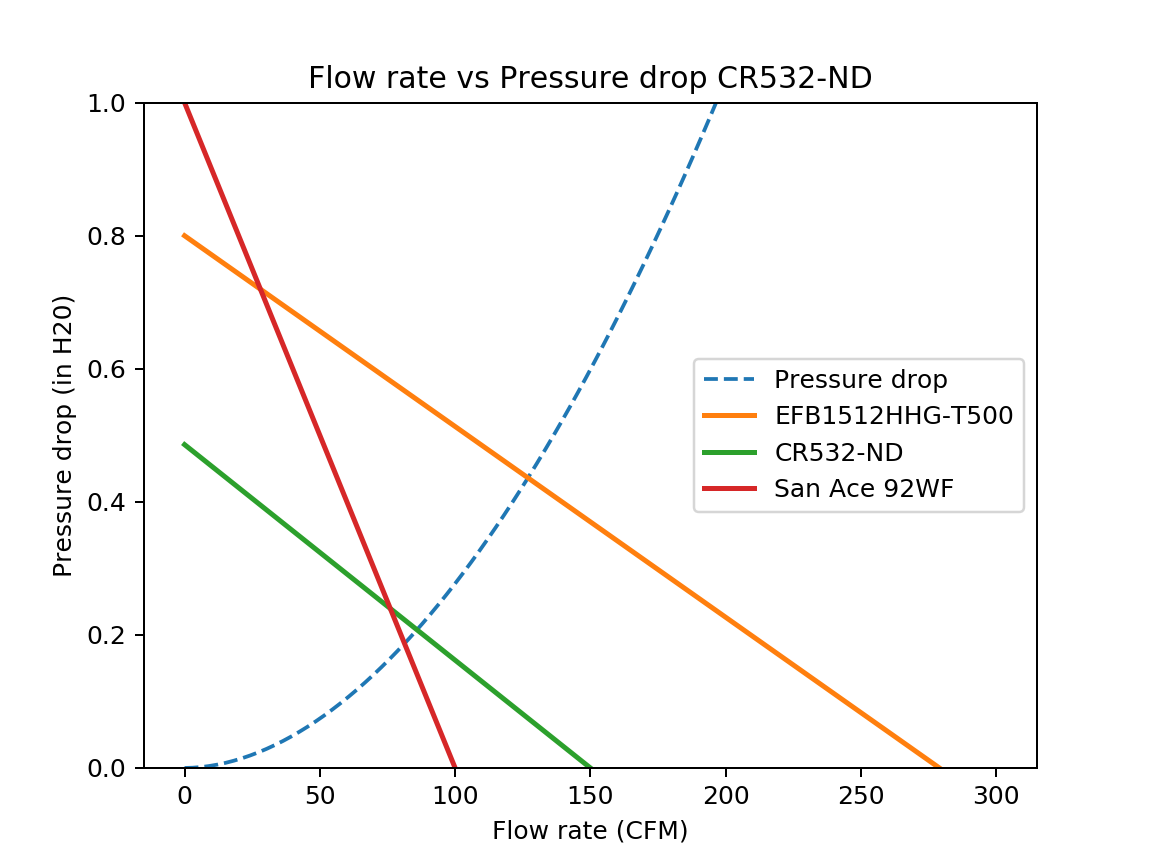

In [60]:

plt.figure()
plt.plot(flow_rate_array, delta_h_array, label='Pressure drop', linestyle = '--')

for key in fans:
    static_pressure = fans[key]['static pressure']
    max_flow_rate = fans[key]['max flow rate']
    fan_characteristic = np.array([-flow_rate*static_pressure/max_flow_rate + static_pressure for flow_rate in flow_rate_array])

    # Plot the performance characteistics to find the operating point
    plt.plot(flow_rate_array, fan_characteristic, label= key, linewidth = 2)
    
    
plt.xlabel('Flow rate (CFM)')
plt.ylabel('Pressure drop (in H20)')
plt.ylim(0, 1.0)
plt.legend()
plt.title('Flow rate vs Pressure drop ' + fan_name)
plt.show()